In [1]:
import sys
sys.path = ['/home/msc23h6/MSDocuments/master_thesis/code/mine/jammer_mitigation'] + sys.path

In [2]:
import os
# import drjit
gpu_num = 2 # Use "" to use the CPU
os.environ["CUDA_VISIBLE_DEVICES"] = f"{gpu_num}"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import sionna
import tensorflow as tf
import pickle
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
tf.get_logger().setLevel('ERROR')

import refactor
from refactor.simulation_model import *
from refactor.utils import *
import refactor.simulation_model as sim

EbNo [dB] |        BER |       BLER |  bit errors |    num bits | block errors |  num blocks | runtime [s] |    status
---------------------------------------------------------------------------------------------------------------------------------------
     -5.0 | 9.8964e-02 | 1.0000e+00 |   466970221 |  4718592000 |       768000 |      768000 |       677.1 |reached max iter       
   -3.667 | 8.0593e-02 | 1.0000e+00 |   380284622 |  4718592000 |       768000 |      768000 |       662.1 |reached max iter       
   -2.333 | 6.7331e-02 | 1.0000e+00 |   317705931 |  4718592000 |       768000 |      768000 |       662.6 |reached max iter       
     -1.0 | 5.8071e-02 | 1.0000e+00 |   274014687 |  4718592000 |       768000 |      768000 |       661.0 |reached max iter       
    0.333 | 5.1783e-02 | 1.0000e+00 |   244345130 |  4718592000 |       768000 |      768000 |       661.2 |reached max iter       
    1.667 | 4.7543e-02 | 1.0000e+00 |   224335902 |  4718592000 |       768000 |     

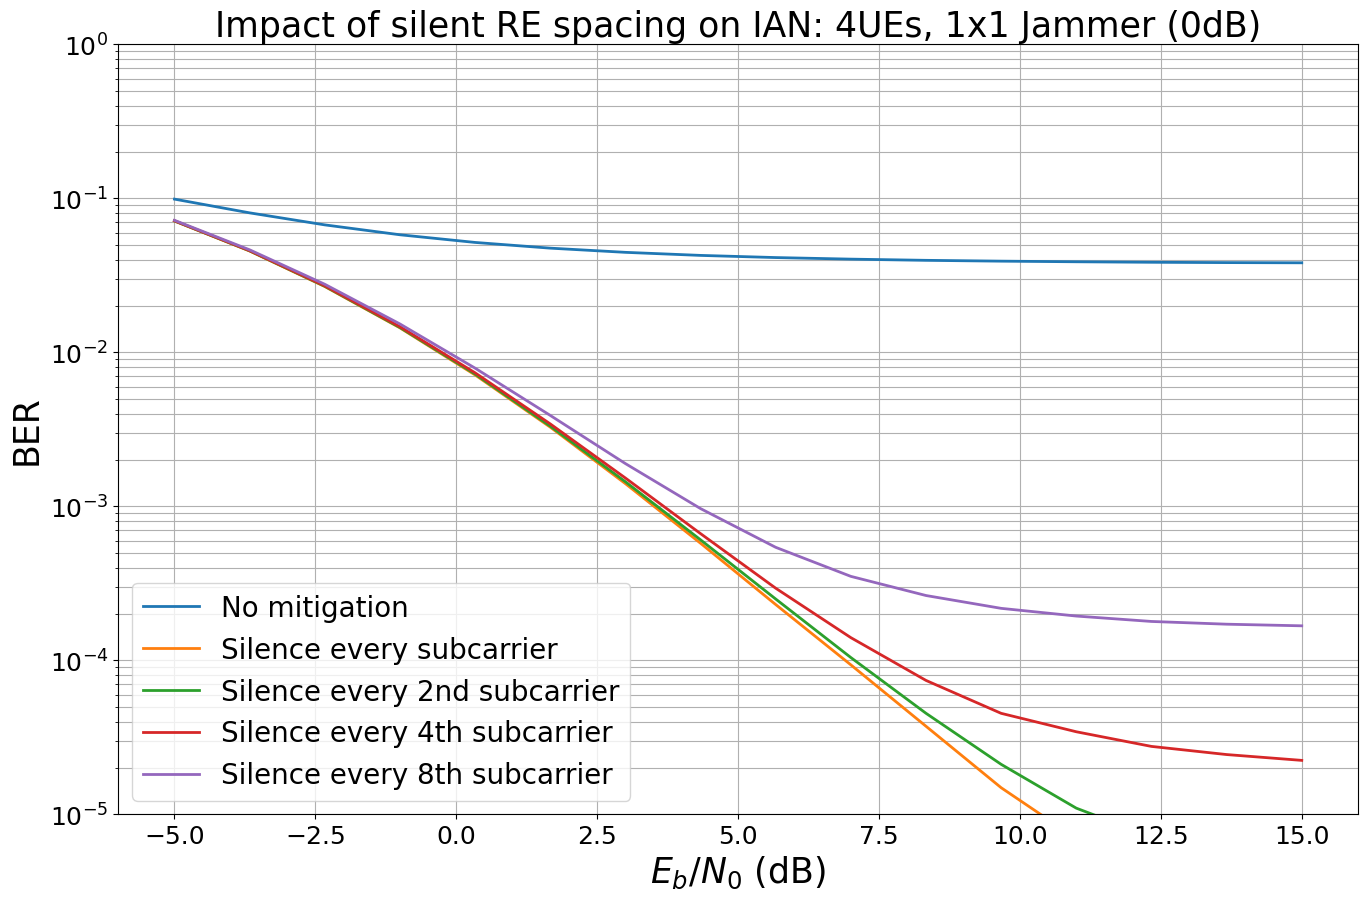

In [3]:
ber_plots.reset()
sim.BATCH_SIZE = 512
# sim.MAX_MC_ITER = 500
# sim.ebno_dbs = np.linspace(-5, 15, 8)
sim.MAX_MC_ITER = 1500
sim.ebno_dbs = np.linspace(-5, 15, 16)

model_parameters = {}
jammer_parameters = {}
model_parameters["jammer_parameters"] = jammer_parameters

model_parameters["jammer_present"] = True
model_parameters["num_silent_pilot_symbols"] = 4

model = Model(**model_parameters)
simulate_model(model, f"No mitigation")

model_parameters["jammer_mitigation"] = "ian"

# model = Model(**model_parameters)
# simulate_model(model, f"IAN, normal")

model_parameters["use_covariance_estimator"] = True
model = Model(**model_parameters)
simulate_model(model, f"Silence every subcarrier")

model_parameters["silence_every_n_subcarriers"] = 2
model = Model(**model_parameters)
simulate_model(model, f"Silence every 2nd subcarrier")

model_parameters["silence_every_n_subcarriers"] = 4
model = Model(**model_parameters)
simulate_model(model, f"Silence every 4th subcarrier")

model_parameters["silence_every_n_subcarriers"] = 8
model = Model(**model_parameters)
simulate_model(model, f"Silence every 8th subcarrier")

ber_plots.title = "Impact of silent RE spacing on IAN: 4UEs, 1x1 Jammer (0dB)"
ber_plots(ylim=(1e-5, 1))
with open("silent_spacing.pickle", "wb") as f:
    pickle.dump(ber_plots, f)
